In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("dataset.csv")

In [3]:
df.shape

(2000, 21)

In [3]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


C:\Users\Lenovo PC\AppData\Local\Temp\ipykernel_6352\2354393109.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_range', data=df, palette='Set2')


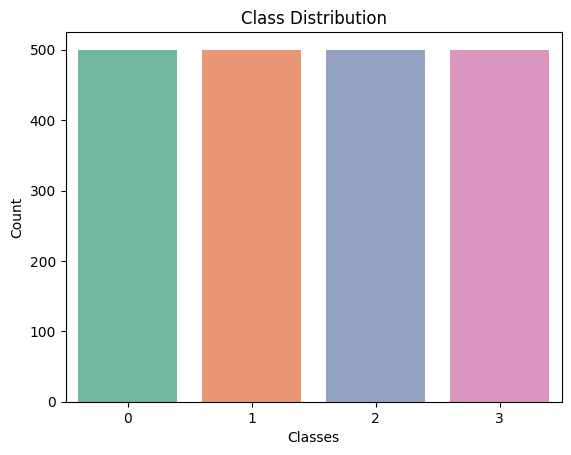

In [24]:
sns.countplot(x='price_range', data=df, palette='Set2')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

# Applying ANOVA test for better feature selection

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [7]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [9]:
x=df[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]

In [10]:
y=df['price_range']

In [11]:
anova_scores, _ = f_classif(x, y)

In [12]:
print("ANOVA F-scores:\n", anova_scores)

ANOVA F-scores:
 [3.15981575e+01 4.76767709e-01 4.93707801e-01 4.28239286e-01
 7.72181960e-01 1.05952453e+00 2.92299608e+00 1.50068244e+00
 3.59431819e+00 2.62541515e+00 8.25446358e-01 1.94848418e+01
 2.26208825e+01 3.52011082e+03 2.22598374e+00 1.67099983e+00
 1.62881131e+00 4.57319750e-01 1.29330223e+00 2.84940470e-01]


In [13]:
fs=SelectKBest(score_func=f_classif, k=10)

In [14]:
fs

SelectKBest()

In [15]:
x_selected = fs.fit_transform(x, y)

In [16]:
fs.get_support(True)

array([ 0,  6,  8,  9, 11, 12, 13, 14, 15, 16])

In [ ]:
'battery_power', 'int_memory','mobile_wt','n_cores','px_height','px_width','ram','sc_h','sc_w','talk_time'

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
x_data=df[['battery_power', 'int_memory','mobile_wt','n_cores','px_height','px_width','ram','sc_h','sc_w','talk_time']]
y=df['price_range']

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size=0.2, random_state=42)

In [7]:
sc=StandardScaler()

In [8]:
x_train= sc.fit_transform(x_train)

In [9]:
x_test = sc.fit_transform(x_test)

# Decision Tree Classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtc=DecisionTreeClassifier()

In [12]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [13]:
y_pred=dtc.predict(x_test)

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
a1=accuracy_score(y_test, y_pred)
c1=classification_report(y_test, y_pred)
m1=confusion_matrix(y_test, y_pred)

In [16]:
print("Accuracy Score is :\n ", a1)
print("\n")
print("Classification Report is :\n", c1)
print("\n")
print("Confusion Matrix is :\n", m1)

Accuracy Score is :
  0.8275


Classification Report is :
               precision    recall  f1-score   support

           0       0.94      0.86      0.90       105
           1       0.71      0.88      0.79        91
           2       0.76      0.71      0.73        92
           3       0.90      0.86      0.88       112

    accuracy                           0.83       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.84      0.83      0.83       400



Confusion Matrix is :
 [[90 15  0  0]
 [ 6 80  5  0]
 [ 0 16 65 11]
 [ 0  1 15 96]]


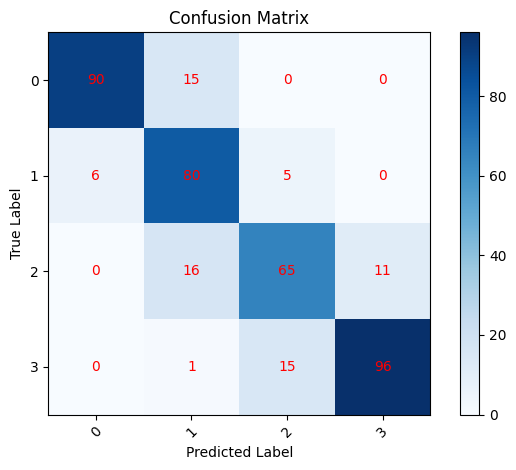

In [17]:
plt.imshow(m1, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = ['0','1', '2','3']  # Adjust based on your dataset
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
for i in range(m1.shape[0]):
    for j in range(m1.shape[1]):
        plt.text(j, i, format(m1[i, j], 'd'), ha="center", va="center", color="red")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Hyper Parameter Tuning for Decision Tree Classifier

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
parameters = {
    'max_features': ['log2', 'sqrt', 'auto'],  # Valid values for max_features
    'criterion': ['entropy', 'gini'],         # Options for splitting criteria
    'max_depth': [2, 3, 5, 10, 50],           # Maximum depth of the tree
    'min_samples_split': [2, 3, 50, 100],     # Minimum samples required to split
    'min_samples_leaf': [1, 5, 8, 10]         # Minimum samples at a leaf node (fixed)
}

In [20]:
# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=dtc, param_grid=parameters, cv=5, scoring='accuracy', verbose=1)

In [21]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
800 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python312\Lib\site-pack

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 5, 10, 50],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 5, 8, 10],
                         'min_samples_split': [2, 3, 50, 100]},
             scoring='accuracy', verbose=1)

In [22]:
dtc=grid_search.best_estimator_

In [23]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_split=3)

In [24]:
y_pred=dtc.predict(x_test)

In [25]:
a2=accuracy_score(y_test, y_pred)
c2=classification_report(y_test, y_pred)
m2=confusion_matrix(y_test, y_pred)

In [26]:
print("Accuracy Score is :\n ", a2)
print("\n")
print("Classification Report is :\n", c2)
print("\n")
print("Confusion Matrix is :\n", m2)

Accuracy Score is :
  0.6475


Classification Report is :
               precision    recall  f1-score   support

           0       0.75      0.60      0.67       105
           1       0.49      0.62      0.54        91
           2       0.60      0.64      0.62        92
           3       0.79      0.72      0.76       112

    accuracy                           0.65       400
   macro avg       0.66      0.64      0.65       400
weighted avg       0.67      0.65      0.65       400



Confusion Matrix is :
 [[63 41  1  0]
 [20 56 12  3]
 [ 1 14 59 18]
 [ 0  4 27 81]]


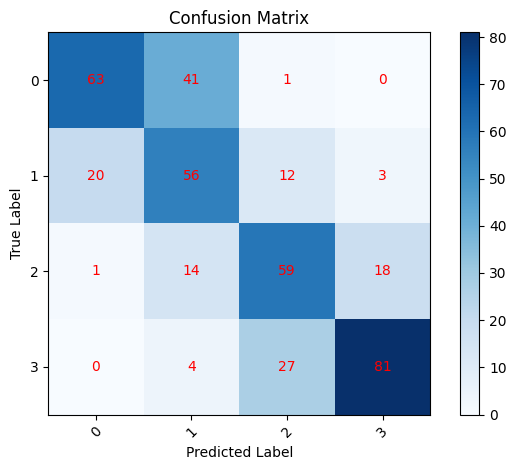

In [27]:
plt.imshow(m2, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = ['0','1', '2','3']  # Adjust based on your dataset
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
for i in range(m2.shape[0]):
    for j in range(m2.shape[1]):
        plt.text(j, i, format(m2[i, j], 'd'), ha="center", va="center", color="red")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Random Tree Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc =RandomForestClassifier(n_estimators=1000)

In [30]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [31]:
y_pred= rfc.predict(x_test)

In [32]:
a3=accuracy_score(y_test, y_pred)
c3=classification_report(y_test, y_pred)
m3=confusion_matrix(y_test, y_pred)

In [33]:
print("Accuracy Score is :\n ", a3)
print("\n")
print("Classification Report is :\n", c3)
print("\n")
print("Confusion Matrix is :\n", m3)

Accuracy Score is :
  0.9125


Classification Report is :
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       105
           1       0.88      0.95      0.91        91
           2       0.85      0.86      0.85        92
           3       0.95      0.88      0.92       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



Confusion Matrix is :
 [[101   4   0   0]
 [  4  86   1   0]
 [  0   8  79   5]
 [  0   0  13  99]]


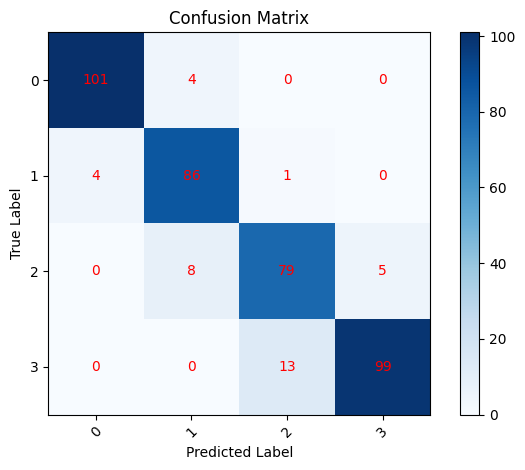

In [34]:
plt.imshow(m3, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = ['0','1', '2','3']  # Adjust based on your dataset
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
for i in range(m3.shape[0]):
    for j in range(m3.shape[1]):
        plt.text(j, i, format(m3[i, j], 'd'), ha="center", va="center", color="red")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Applying PCA on the data

In [35]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=10)

In [39]:
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [40]:
rfc.fit(x_train_pca, y_train)

RandomForestClassifier(n_estimators=1000)

In [41]:
y_pred= rfc.predict(x_test_pca)

In [42]:
a4=accuracy_score(y_test, y_pred)
c4=classification_report(y_test, y_pred)
m4=confusion_matrix(y_test, y_pred)

In [43]:
print("Accuracy Score is :\n ", a4)
print("\n")
print("Classification Report is :\n", c4)
print("\n")
print("Confusion Matrix is :\n", m4)

Accuracy Score is :
  0.765


Classification Report is :
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       105
           1       0.65      0.65      0.65        91
           2       0.62      0.70      0.66        92
           3       0.91      0.81      0.86       112

    accuracy                           0.77       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.77      0.77      0.77       400



Confusion Matrix is :
 [[92 13  0  0]
 [14 59 18  0]
 [ 0 19 64  9]
 [ 0  0 21 91]]


In [45]:
explained_variance_ratio = pca.explained_variance_ratio_

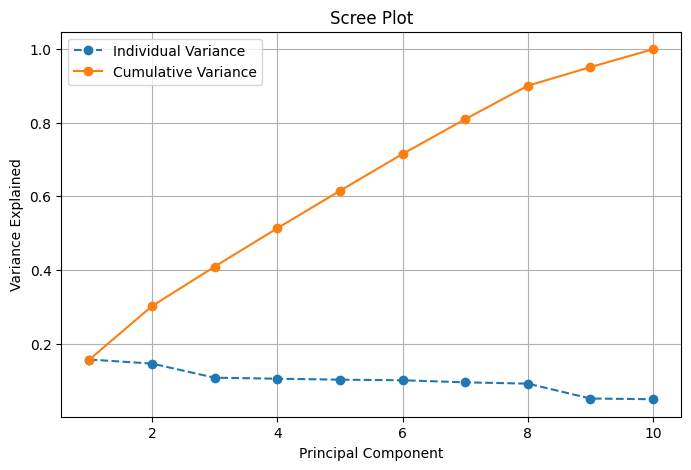

In [46]:
# Plot the scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', label='Individual Variance')
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', label='Cumulative Variance')

plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.legend(loc='best')
plt.grid()
plt.show()

In [63]:
df["price_range"].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

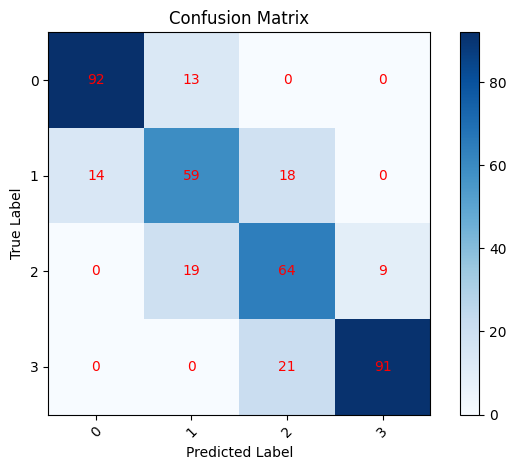

In [44]:
plt.imshow(m4, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = ['0','1', '2','3']  # Adjust based on your dataset
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
for i in range(m4.shape[0]):
    for j in range(m3.shape[1]):
        plt.text(j, i, format(m4[i, j], 'd'), ha="center", va="center", color="red")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()